Epoch 1/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 1.6342e-04 - loss: -27147.5332 - val_accuracy: 0.0000e+00 - val_loss: -65526.6602
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 45s 245ms/step - accuracy: 6.8174e-04 - loss: -79384.2891 - val_accuracy: 0.0000e+00 - val_loss: -107196.9688
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - accuracy: 8.4060e-05 - loss: -121695.3203 - val_accuracy: 0.0000e+00 - val_loss: -148281.2031
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 6.7825e-04 - loss: -165226.9062 - val_accuracy: 0.0000e+00 - val_loss: -188834.5781
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 2.8878e-04 - loss: -209369.3125 - val_accuracy: 0.0000e+00 - val_loss: -229152.9688
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step
Accuracy: 0.0
Confusion Matrix:
 [[ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]]
Classification Report:
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

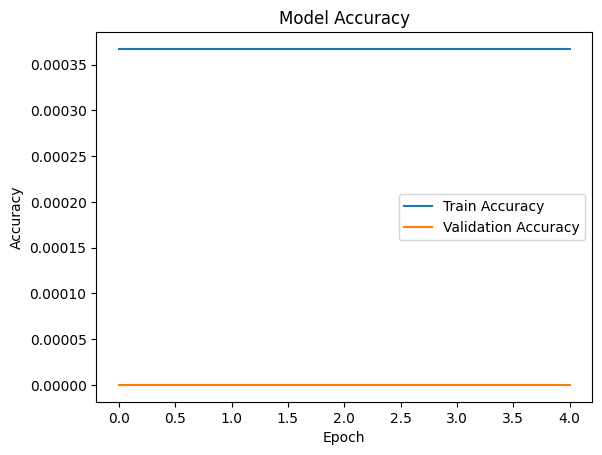

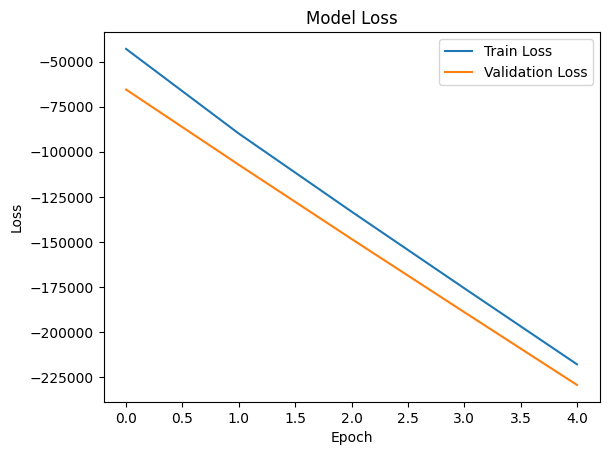

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
df = pd.read_csv('books.csv')

# Preprocess the data
df['subtitle'] = df['subtitle'].fillna('')  # Replace NaN with an empty string
X = df['subtitle'].astype(str).values  # Ensure all entries are strings
y = df['authors'].values

# Label encoding for authors
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_len)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))  # Remove input_length as it's deprecated
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



